# Indonesian Naive Bayes Sentiment Analyzer Demo
This notebook demonstrates the usage of the Indonesian Naive Bayes Sentiment Analyzer that combines multiple Indonesian lexicon resources.

In [1]:
import pandas as pd
import numpy as np
from indonesian_naive_bayes_analyzer import IndonesianNaiveBayesAnalyzer, create_sample_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

## 1. Initialize the Analyzer
The analyzer will automatically load multiple Indonesian lexicon resources from GitHub repositories.

In [2]:
# Initialize the Indonesian Naive Bayes Analyzer
print("Initializing Indonesian Naive Bayes Sentiment Analyzer...")
analyzer = IndonesianNaiveBayesAnalyzer()

# Display loaded lexicons
print(f"\nLoaded {len(analyzer.lexicons)} lexicon resources:")
for name, lexicon in analyzer.lexicons.items():
    print(f"- {name}: {len(lexicon)} entries")

Initializing Indonesian Naive Bayes Sentiment Analyzer...
Loading Indonesian lexicon resources...
Loading sentiwords_id...
✓ Loaded sentiwords_id: 0 entries
Loading combined_lexicon...
✓ Loaded combined_lexicon: 16696 entries
Loading sentistrength_valence...
✓ Loaded sentistrength_valence: 0 entries
Loading emoji_lexicon...
✓ Loaded emoji_lexicon: 2 entries
Loading sentimentword...
✓ Loaded sentimentword: 1548 entries
Loading idiom...
✓ Loaded idiom: 1 entries
Loading emoticon...
✓ Loaded emoticon: 121 entries
Loading boosterword...
✓ Loaded boosterword: 21 entries
Loading negatingword...
✓ Loaded negatingword: 15 entries
Total lexicons loaded: 9

Loaded 9 lexicon resources:
- sentiwords_id: 0 entries
- combined_lexicon: 16696 entries
- sentistrength_valence: 0 entries
- emoji_lexicon: 2 entries
- sentimentword: 1548 entries
- idiom: 1 entries
- emoticon: 121 entries
- boosterword: 21 entries
- negatingword: 15 entries


## 2. Create Sample Dataset
We'll create a sample Indonesian sentiment dataset for demonstration.

In [3]:
# Create sample dataset
texts, labels = create_sample_dataset()

# Create DataFrame for better visualization
df_sample = pd.DataFrame({
    'text': texts,
    'sentiment': labels
})

print(f"Sample dataset created with {len(df_sample)} examples")
print(f"\nSentiment distribution:")
print(df_sample['sentiment'].value_counts())

# Display sample data
print(f"\nSample data:")
display(df_sample.head(10))

Sample dataset created with 15 examples

Sentiment distribution:
sentiment
positive    5
negative    5
neutral     5
Name: count, dtype: int64

Sample data:


,text,sentiment
0,Film ini sangat bagus dan menghibur,positive
1,Saya suka sekali dengan ceritanya,positive
2,Aktingnya luar biasa hebat,positive
3,Sangat memuaskan dan tidak mengecewakan,positive
4,Film yang indah dan menyentuh hati,positive
5,Film ini buruk sekali,negative
6,Saya tidak suka dengan jalan ceritanya,negative
7,Aktingnya sangat jelek dan mengecewakan,negative
8,Sangat membosankan dan tidak menarik,negative
9,Film yang parah dan membuang waktu,negative


## 3. Analyze Lexicon Coverage
Let's analyze how well our lexicons cover the vocabulary in the dataset.

Analyzing lexicon coverage...
Lexicon Coverage Analysis:
Total words: 79
Covered words: 48
Coverage: 60.76%

Hits per lexicon:
  combined_lexicon: 48
  sentimentword: 20
  negatingword: 6


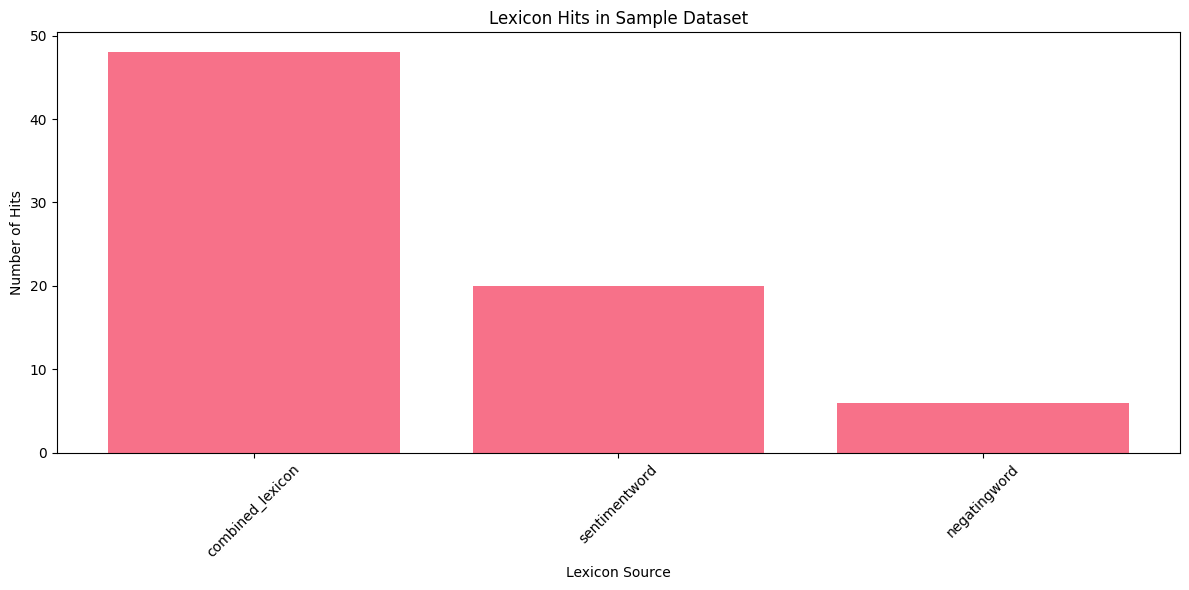


Overall lexicon coverage: 60.76%


In [4]:
# Analyze lexicon coverage
coverage_results = analyzer.analyze_lexicon_coverage(texts)

# Visualize lexicon hits
lexicon_hits = coverage_results['lexicon_hits']
if lexicon_hits:
    plt.figure(figsize=(12, 6))
    plt.bar(lexicon_hits.keys(), lexicon_hits.values())
    plt.title('Lexicon Hits in Sample Dataset')
    plt.xlabel('Lexicon Source')
    plt.ylabel('Number of Hits')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
print(f"\nOverall lexicon coverage: {coverage_results['coverage']:.2%}")

## 4. Extract Lexicon Features
Let's examine the lexicon-based features extracted from sample texts.

Lexicon Features Analysis:

Text 1: Film ini sangat bagus dan menghibur sekali
Sentiment Score: 5.750
Positive Words: 4
Negative Words: 2
Booster Words: 0
Negation Words: 0

Text 2: Saya tidak suka dengan film ini, sangat buruk
Sentiment Score: 11.333
Positive Words: 2
Negative Words: 5
Booster Words: 0
Negation Words: 1

Text 3: Film yang biasa saja, tidak terlalu istimewa
Sentiment Score: 19.333
Positive Words: 0
Negative Words: 6
Booster Words: 0
Negation Words: 1


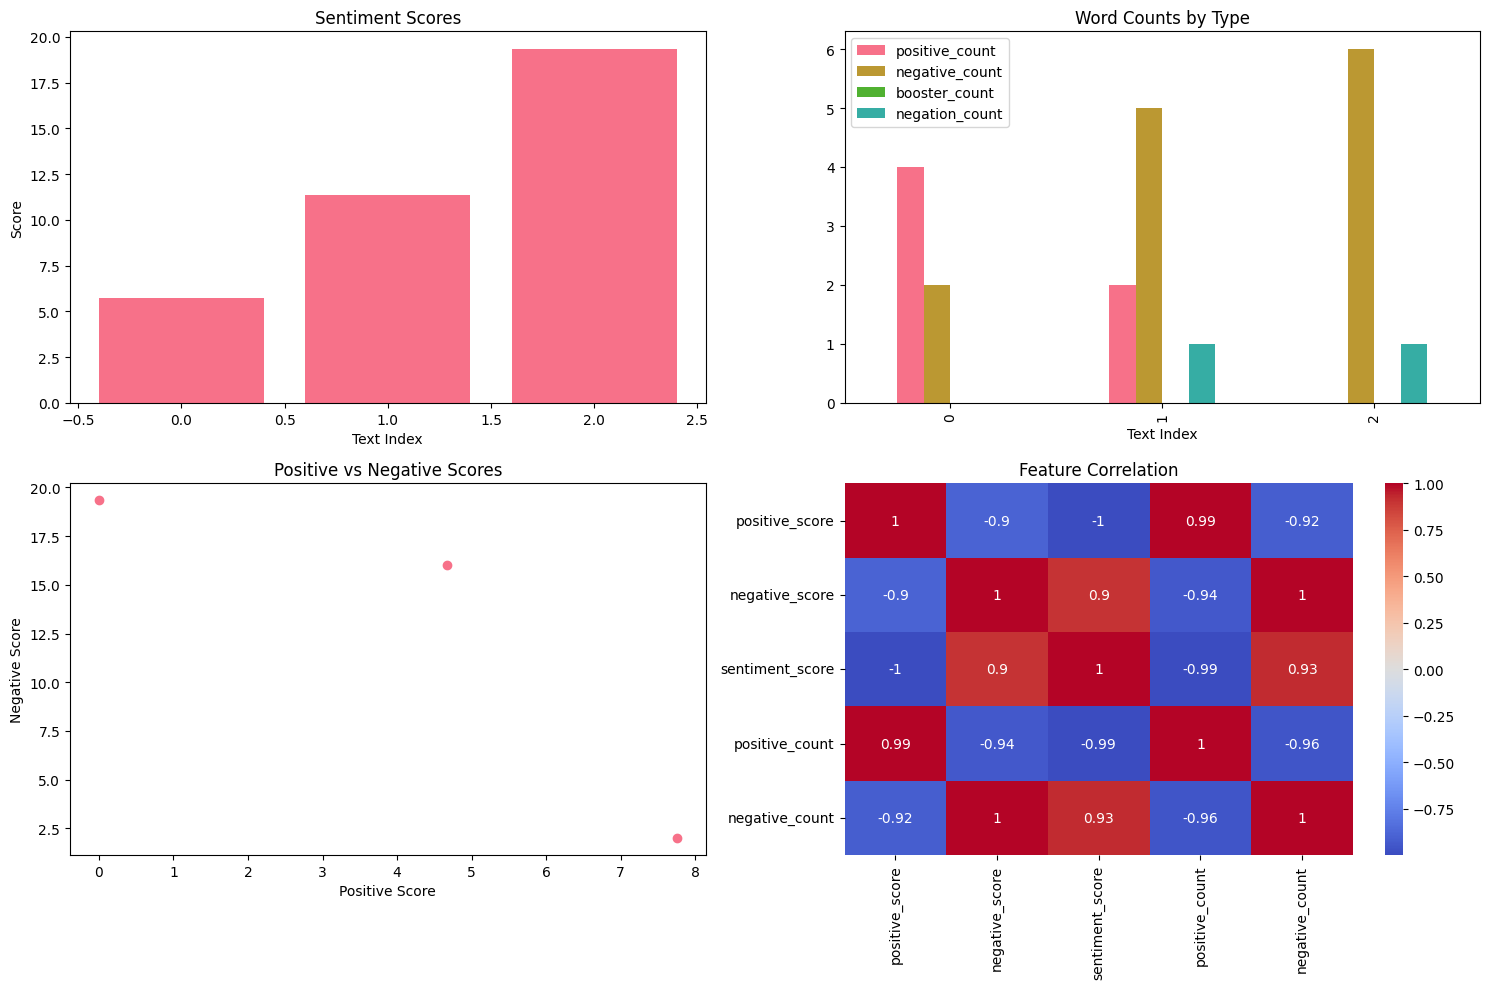

In [5]:
# Extract features for sample texts
sample_texts = [
    "Film ini sangat bagus dan menghibur sekali",
    "Saya tidak suka dengan film ini, sangat buruk",
    "Film yang biasa saja, tidak terlalu istimewa"
]

print("Lexicon Features Analysis:")
print("=" * 50)

feature_data = []
for i, text in enumerate(sample_texts):
    features = analyzer.extract_lexicon_features(text)
    feature_data.append(features)
    
    print(f"\nText {i+1}: {text}")
    print(f"Sentiment Score: {features['sentiment_score']:.3f}")
    print(f"Positive Words: {features['positive_count']}")
    print(f"Negative Words: {features['negative_count']}")
    print(f"Booster Words: {features['booster_count']}")
    print(f"Negation Words: {features['negation_count']}")

# Create DataFrame for features
df_features = pd.DataFrame(feature_data)
df_features['text'] = sample_texts

# Visualize features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sentiment scores
axes[0,0].bar(range(len(sample_texts)), df_features['sentiment_score'])
axes[0,0].set_title('Sentiment Scores')
axes[0,0].set_xlabel('Text Index')
axes[0,0].set_ylabel('Score')

# Word counts
word_counts = df_features[['positive_count', 'negative_count', 'booster_count', 'negation_count']]
word_counts.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Word Counts by Type')
axes[0,1].set_xlabel('Text Index')
axes[0,1].legend()

# Positive vs Negative scores
axes[1,0].scatter(df_features['positive_score'], df_features['negative_score'])
axes[1,0].set_title('Positive vs Negative Scores')
axes[1,0].set_xlabel('Positive Score')
axes[1,0].set_ylabel('Negative Score')

# Feature correlation
feature_cols = ['positive_score', 'negative_score', 'sentiment_score', 'positive_count', 'negative_count']
corr_matrix = df_features[feature_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Feature Correlation')

plt.tight_layout()
plt.show()

## 5. Train the Naive Bayes Model
Now let's train the Naive Bayes model using the combined lexicon and TF-IDF features.

In [6]:
# Train the model
print("Training the Indonesian Naive Bayes model...")
training_results = analyzer.train(texts, labels, test_size=0.3, random_state=42)

print(f"\nTraining Results:")
print(f"Accuracy: {training_results['accuracy']:.4f}")

Training the Indonesian Naive Bayes model...
Training Indonesian Naive Bayes Analyzer...
Extracting lexicon features...
Extracting TF-IDF features...
Training Naive Bayes model...
Training completed!
Accuracy: 0.8000

Classification Report:
              precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
     neutral       1.00      0.50      0.67         2
    positive       1.00      1.00      1.00         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.78         5
weighted avg       0.90      0.80      0.80         5


Training Results:
Accuracy: 0.8000


## 6. Test Predictions
Let's test the trained model on various Indonesian texts.

Sentiment Analysis Results:
Extracting lexicon features...
Extracting TF-IDF features...

Text 1: Film ini sangat bagus dan menghibur sekali, saya suka banget!
Predicted Sentiment: positive
Confidence: 0.965
Lexicon Score: 8.417
Positive Words: 7, Negative Words: 3
--------------------------------------------------------------------------------
Extracting lexicon features...
Extracting TF-IDF features...

Text 2: Saya tidak suka dengan film ini, sangat buruk dan mengecewakan
Predicted Sentiment: neutral
Confidence: 0.692
Lexicon Score: 17.333
Positive Words: 2, Negative Words: 7
--------------------------------------------------------------------------------
Extracting lexicon features...
Extracting TF-IDF features...

Text 3: Film yang biasa saja, tidak terlalu istimewa tapi lumayan
Predicted Sentiment: neutral
Confidence: 0.750
Lexicon Score: 19.833
Positive Words: 0, Negative Words: 7
--------------------------------------------------------------------------------
Extracting lexicon

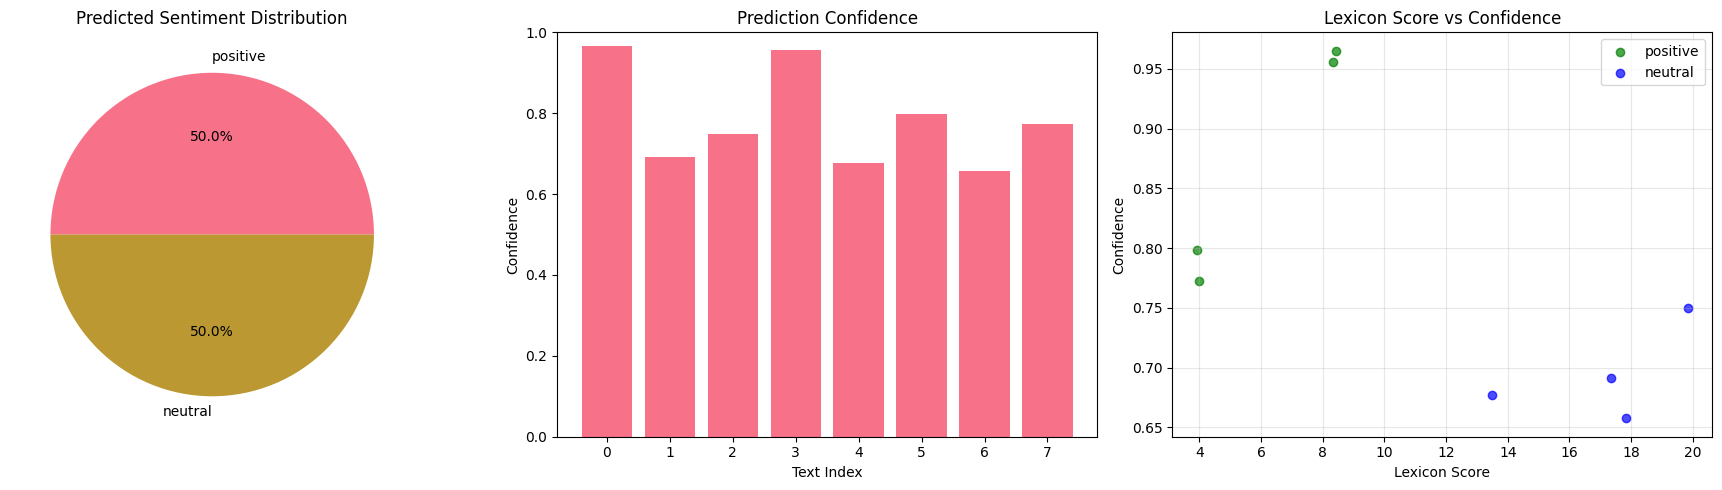

In [7]:
# Test texts
test_texts = [
    "Film ini sangat bagus dan menghibur sekali, saya suka banget!",
    "Saya tidak suka dengan film ini, sangat buruk dan mengecewakan",
    "Film yang biasa saja, tidak terlalu istimewa tapi lumayan",
    "Ceritanya hebat dan aktingnya luar biasa, sangat memuaskan",
    "Sangat membosankan, saya tidak akan merekomendasikan film ini",
    "Film yang cukup bagus untuk ditonton bersama keluarga",
    "Tidak ada yang menarik dari film ini, membuang waktu saja",
    "Saya sangat terkesan dengan kualitas produksinya yang mantap"
]

print("Sentiment Analysis Results:")
print("=" * 80)

results = []
for i, text in enumerate(test_texts):
    result = analyzer.predict_sentiment(text)
    results.append(result)
    
    print(f"\nText {i+1}: {text}")
    print(f"Predicted Sentiment: {result['sentiment']}")
    print(f"Confidence: {result['confidence']:.3f}")
    print(f"Lexicon Score: {result['lexicon_score']:.3f}")
    print(f"Positive Words: {result['positive_words']}, Negative Words: {result['negative_words']}")
    print("-" * 80)

# Create results DataFrame
df_results = pd.DataFrame({
    'text': test_texts,
    'predicted_sentiment': [r['sentiment'] for r in results],
    'confidence': [r['confidence'] for r in results],
    'lexicon_score': [r['lexicon_score'] for r in results]
})

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sentiment distribution
sentiment_counts = df_results['predicted_sentiment'].value_counts()
axes[0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
axes[0].set_title('Predicted Sentiment Distribution')

# Confidence scores
axes[1].bar(range(len(test_texts)), df_results['confidence'])
axes[1].set_title('Prediction Confidence')
axes[1].set_xlabel('Text Index')
axes[1].set_ylabel('Confidence')
axes[1].set_ylim(0, 1)

# Lexicon scores vs confidence
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'blue'}
for sentiment in df_results['predicted_sentiment'].unique():
    mask = df_results['predicted_sentiment'] == sentiment
    axes[2].scatter(df_results[mask]['lexicon_score'], df_results[mask]['confidence'], 
                   c=colors.get(sentiment, 'gray'), label=sentiment, alpha=0.7)

axes[2].set_title('Lexicon Score vs Confidence')
axes[2].set_xlabel('Lexicon Score')
axes[2].set_ylabel('Confidence')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Model Performance Analysis
Let's analyze the model's performance in more detail.

Detailed Classification Report:


,precision,recall,f1-score
negative,0.500,1.000,0.667
neutral,1.000,0.500,0.667
positive,1.000,1.000,1.000
accuracy,0.800,0.800,0.800
macro avg,0.833,0.833,0.778
weighted avg,0.900,0.800,0.800


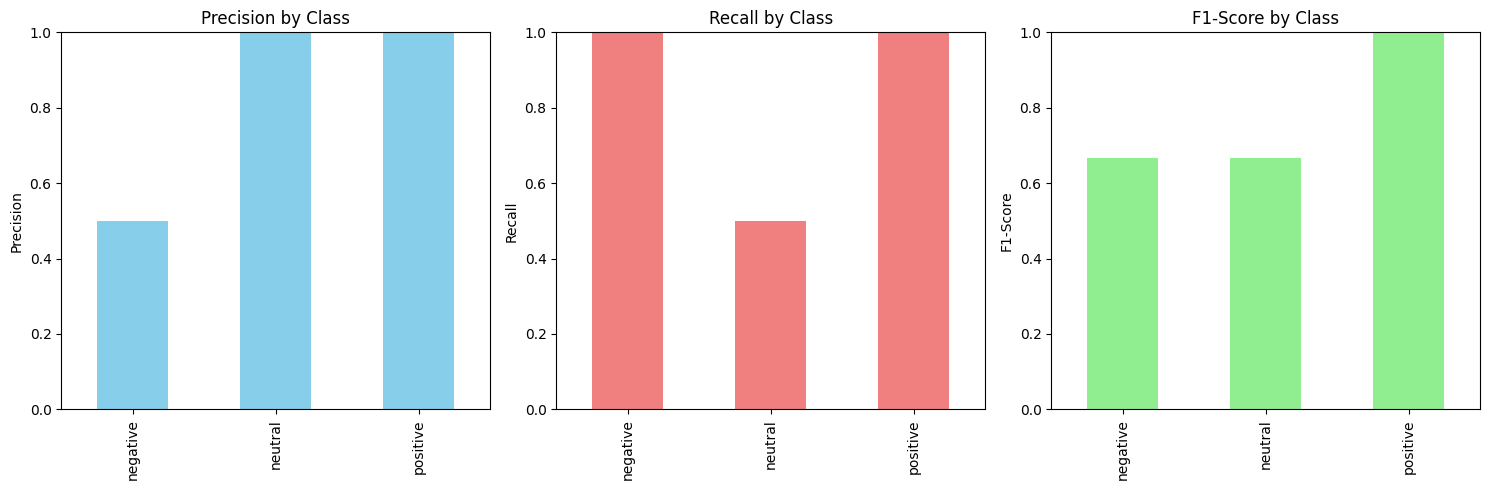


Model Summary:
- Lexicon sources: 9
- Total lexicon entries: 18404
- Training accuracy: 0.8000
- Feature combination: Lexicon + TF-IDF


In [8]:
# Display detailed classification report
if 'classification_report' in training_results:
    report = training_results['classification_report']
    
    print("Detailed Classification Report:")
    print("=" * 50)
    
    # Create DataFrame for better visualization
    metrics_df = pd.DataFrame(report).transpose()
    
    # Remove support column for cleaner display
    if 'support' in metrics_df.columns:
        display_df = metrics_df.drop('support', axis=1)
    else:
        display_df = metrics_df
    
    display(display_df.round(3))
    
    # Visualize metrics
    if len(display_df) > 3:  # Ensure we have class-specific metrics
        class_metrics = display_df.iloc[:-3]  # Exclude macro avg, weighted avg, accuracy
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Precision
        class_metrics['precision'].plot(kind='bar', ax=axes[0], color='skyblue')
        axes[0].set_title('Precision by Class')
        axes[0].set_ylabel('Precision')
        axes[0].set_ylim(0, 1)
        
        # Recall
        class_metrics['recall'].plot(kind='bar', ax=axes[1], color='lightcoral')
        axes[1].set_title('Recall by Class')
        axes[1].set_ylabel('Recall')
        axes[1].set_ylim(0, 1)
        
        # F1-score
        class_metrics['f1-score'].plot(kind='bar', ax=axes[2], color='lightgreen')
        axes[2].set_title('F1-Score by Class')
        axes[2].set_ylabel('F1-Score')
        axes[2].set_ylim(0, 1)
        
        plt.tight_layout()
        plt.show()

print(f"\nModel Summary:")
print(f"- Lexicon sources: {len(analyzer.lexicons)}")
print(f"- Total lexicon entries: {sum(len(lex) for lex in analyzer.lexicons.values())}")
print(f"- Training accuracy: {training_results['accuracy']:.4f}")
print(f"- Feature combination: Lexicon + TF-IDF")

## 8. Save and Load Model
Demonstrate how to save and load the trained model.

In [9]:
# Save the model
model_path = 'indonesian_nb_sentiment_model.pkl'
analyzer.save_model(model_path)

# Load the model (demonstration)
new_analyzer = IndonesianNaiveBayesAnalyzer()
new_analyzer.load_model(model_path)

# Test the loaded model
test_text = "Film ini sangat bagus dan menghibur"
result = new_analyzer.predict_sentiment(test_text)

print(f"Testing loaded model:")
print(f"Text: {test_text}")
print(f"Sentiment: {result['sentiment']}")
print(f"Confidence: {result['confidence']:.3f}")

print(f"\nModel successfully saved and loaded!")

Model saved to indonesian_nb_sentiment_model.pkl
Loading Indonesian lexicon resources...
Loading sentiwords_id...
✓ Loaded sentiwords_id: 0 entries
Loading combined_lexicon...
✓ Loaded combined_lexicon: 16696 entries
Loading sentistrength_valence...
✓ Loaded sentistrength_valence: 0 entries
Loading emoji_lexicon...
✓ Loaded emoji_lexicon: 2 entries
Loading sentimentword...
✓ Loaded sentimentword: 1548 entries
Loading idiom...
✓ Loaded idiom: 1 entries
Loading emoticon...
✓ Loaded emoticon: 121 entries
Loading boosterword...
✓ Loaded boosterword: 21 entries
Loading negatingword...
✓ Loaded negatingword: 15 entries
Total lexicons loaded: 9
Model loaded from indonesian_nb_sentiment_model.pkl
Extracting lexicon features...
Extracting TF-IDF features...
Testing loaded model:
Text: Film ini sangat bagus dan menghibur
Sentiment: positive
Confidence: 0.928

Model successfully saved and loaded!
